In [1]:
from comchoice import Pairwise
import pandas as pd

In [ ]:
_data = [
  (1, 2, 1, "A"),
  (2, 4, 2, "A"),
  (1, 3, 1, "A"),
  (1, 4, 1, "A"),
  (1, 2, 1, "B"),
  (2, 3, 2, "B"),
  (2, 4, 4, "B"),
  (3, 4, 3, "B"),
  (1, 4, 4, "B"),
  (3, 4, 4, "C"),
  (1, 2, 2, "C"),
  (1, 3, 3, "C"),
  (2, 3, 3, "C")
]
df = pd.DataFrame(_data, columns=["option_a", "option_b", "selected", "uuid"])
df

In [ ]:
pwc = Pairwise(df)

In [ ]:
df_divisiveness = pwc.divisiveness()

In [ ]:
df_divisiveness

In [2]:
df = pd.read_json("/Users/cnavarreteliz/Downloads/Video_Games_5.json", lines=True)
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [3]:
dd = df.groupby("asin").agg({"overall": "count"}).sort_values("overall", ascending=False).head(50).reset_index()

ids = dd["asin"].unique()

In [5]:
pwc = Pairwise(df[df["asin"].isin(ids)])

pwc.alternative = "asin"
pwc.voter = "reviewerID"
pwc.value = "overall"

100%|██████████| 16442/16442 [01:23<00:00, 198.03it/s]


In [7]:
pwc.to_pairwise()
pwc.transform()

In [ ]:
pwc.df

In [9]:
ll = df[df["asin"].isin(dd["asin"])].groupby("asin").agg({"overall": "mean"}).reset_index()

In [8]:
dd = pwc.win_rate().sort_values("value", ascending=False)

In [11]:
import seaborn as sns

In [23]:
cc = pd.merge(ll, dd, on="asin")
# cc = pd.merge(cc, df_divisiveness, on="asin")

<AxesSubplot:xlabel='overall', ylabel='value'>

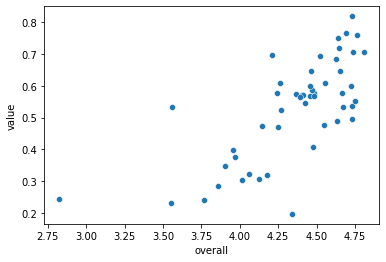

In [24]:
sns.scatterplot(x="overall", y="value", data=cc)

In [27]:
df_movies = pd.read_csv("/Users/cnavarreteliz/Downloads/archive/Netflix_Dataset_Rating.csv")
df_movies.head()

,User_ID,Rating,Movie_ID
0,712664,5,3
1,1331154,4,3
2,2632461,3,3
3,44937,5,3
4,656399,4,3


In [33]:
dd = df_movies.groupby("Movie_ID").agg({"Rating": "count"}).sort_values("Rating", ascending=False).head(30).reset_index()

ids = dd["Movie_ID"].unique()

In [38]:
pwc2 = Pairwise(df_movies[df_movies["Movie_ID"].isin(ids)])

pwc2.alternative = "Movie_ID"
pwc2.voter = "User_ID"
pwc2.value = "Rating"

In [39]:
pwc2.to_pairwise()
pwc2.transform()

100%|██████████| 143365/143365 [07:37<00:00, 313.32it/s]


In [40]:
df_divisiveness = pwc2.divisiveness()

100%|██████████| 870/870 [21:50:30<00:00, 90.38s/it]      


In [41]:
df_divisiveness.sort_values("value", ascending=False)

,Movie_ID,value
15,2452,0.750451
19,3151,0.742230
3,571,0.726615
2,457,0.715953
12,2122,0.715860
16,2782,0.689741
24,3938,0.657031
10,1905,0.654471
25,3962,0.651044
17,2862,0.649685


In [45]:
r = pwc2.win_rate()
r

,Movie_ID,value
0,4356,0.413274
1,1542,0.438763
2,1798,0.539484
3,3860,0.284162
4,2452,0.798295
5,1180,0.552407
6,30,0.429614
7,3106,0.403201
8,3624,0.544402
9,1962,0.433094


In [ ]:
dd = df.groupby("asin").agg({"overall": ["count", "mean", "std"]}).reset_index()
dd.columns = ["asin", "count", "mean", "std"]
dd = dd[dd["count"] > 100]
dd.sort_values("std", ascending=False)

In [ ]:
import seaborn as sns

In [ ]:
sns.regplot(x="std", y="mean", data=dd)

In [ ]:
dd = df_b.groupby("option_a").agg({"uuid": "count"}).reset_index()
dd = dd[dd["uuid"] > 2000]["option_a"].unique()

In [ ]:
len(dd)

In [ ]:
df_b[(df_b["option_a"].isin(dd)) & (df_b["option_b"].isin(dd))]

In [ ]:
pwc = Pairwise(df_b[(df_b["option_a"].isin(dd)) & (df_b["option_b"].isin(dd))])

In [ ]:
df_divisiveness.sort_values("value", ascending=False)

In [ ]:
df_b[df_b["uuid"].isin(dd)].sample(500000)

In [42]:
df_labels = pd.read_csv("/Users/cnavarreteliz/Downloads/archive/Netflix_Dataset_Movie.csv")
df_labels.sort_values("Year")

,Movie_ID,Year,Name
4793,4794,1915,Ancient Civilizations: Land of the Pharaohs
10781,10782,1915,Roti Kapada Aur Makaan
13146,13147,1915,Chaplin's Essanay Comedies: Vol. 1
16677,16678,1915,Jimmy Hollywood
8820,8821,1915,The Birth of a Nation
...,...,...,...
12438,12439,2005,Strawberry Shortcake: Moonlight Mysteries
9104,9105,2005,A Slice of Terror
4386,4387,2005,Nobody Knows
4399,4400,2005,Disney Princess Stories: Vol. 3: Beauty Shines...


In [48]:
asd = pd.merge(r, df_labels, left_on="Movie_ID", right_on="Movie_ID").sort_values("value", ascending=False)
asd = pd.merge(asd, df_divisiveness, on="Movie_ID")
asd

,Movie_ID,value_x,Year,Name,value_y
0,2452,0.798295,2001,Lord of the Rings: The Fellowship of the Ring,0.750451
1,3962,0.778517,2003,Finding Nemo (Widescreen),0.651044
2,4306,0.750856,1999,The Sixth Sense,0.621705
3,2862,0.740419,1991,The Silence of the Lambs,0.649685
4,2782,0.731068,1995,Braveheart,0.689741
5,1905,0.665240,2003,Pirates of the Caribbean: The Curse of the Bla...,0.654471
6,3938,0.635630,2004,Shrek 2,0.657031
7,571,0.562021,1999,American Beauty,0.726615
8,1180,0.552407,2001,A Beautiful Mind,0.607971
9,3624,0.544402,2003,The Last Samurai,0.622362


In [52]:
asd[["value_x", "value_y"]].corr()

,value_x,value_y
value_x,1.000000,0.581657
value_y,0.581657,1.000000


<AxesSubplot:xlabel='value_x', ylabel='value_y'>

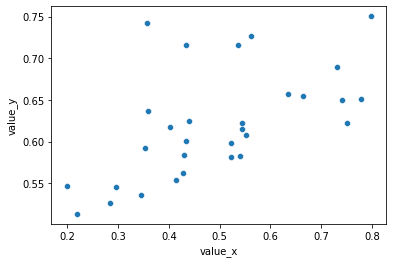

In [50]:
sns.scatterplot(x="value_x", y="value_y", data=asd)

In [53]:
df.head()

,overall,verified,reviewTime,reviewerID,asin,reviewerName,reviewText,summary,unixReviewTime,vote,style,image
0,5,True,"10 17, 2015",A1HP7NVNPFMA4N,0700026657,Ambrosia075,"This game is a bit hard to get the hang of, bu...",but when you do it's great.,1445040000,NaN,NaN,NaN
1,4,False,"07 27, 2015",A1JGAP0185YJI6,0700026657,travis,I played it a while but it was alright. The st...,"But in spite of that it was fun, I liked it",1437955200,NaN,NaN,NaN
2,3,True,"02 23, 2015",A1YJWEXHQBWK2B,0700026657,Vincent G. Mezera,ok game.,Three Stars,1424649600,NaN,NaN,NaN
3,2,True,"02 20, 2015",A2204E1TH211HT,0700026657,Grandma KR,"found the game a bit too complicated, not what...",Two Stars,1424390400,NaN,NaN,NaN
4,5,True,"12 25, 2014",A2RF5B5H74JLPE,0700026657,jon,"great game, I love it and have played it since...",love this game,1419465600,NaN,NaN,NaN


In [ ]:
from comchoice import Pairwise
